In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv', low_memory=False)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275385 entries, 0 to 275384
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AADFYear                    275385 non-null  int64  
 1   CP                          275385 non-null  int64  
 2   Estimation_method           237812 non-null  object 
 3   Estimation_method_detailed  237812 non-null  object 
 4   Region                      275385 non-null  object 
 5   LocalAuthority              275385 non-null  object 
 6   Road                        275385 non-null  object 
 7   RoadCategory                275385 non-null  object 
 8   Easting                     275385 non-null  int64  
 9   Northing                    275385 non-null  int64  
 10  StartJunction               275129 non-null  object 
 11  EndJunction                 275147 non-null  object 
 12  LinkLength_km               275385 non-null  float64
 13  LinkLength_mil

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [8]:
# Hangi sütunda kaç eksik değer var?
df.isnull().sum()


AADFYear                          0
CP                                0
Estimation_method             37573
Estimation_method_detailed    37573
Region                            0
LocalAuthority                    0
Road                              0
RoadCategory                      0
Easting                           0
Northing                          0
StartJunction                   256
EndJunction                     238
LinkLength_km                     0
LinkLength_miles                  0
PedalCycles                       0
Motorcycles                       0
CarsTaxis                         0
BusesCoaches                      0
LightGoodsVehicles                0
V2AxleRigidHGV                    0
V3AxleRigidHGV                    0
V4or5AxleRigidHGV                 0
V3or4AxleArticHGV                 0
V5AxleArticHGV                    0
V6orMoreAxleArticHGV              0
AllHGVs                           0
AllMotorVehicles                  0
Lat                         

In [9]:
df = df.drop(columns=["Estimation_method", "Estimation_method_detailed"])


In [10]:
df = df.dropna(subset=["StartJunction", "EndJunction"])

In [11]:
#df.isnull().sum()


AADFYear                0
CP                      0
Region                  0
LocalAuthority          0
Road                    0
RoadCategory            0
Easting                 0
Northing                0
StartJunction           0
EndJunction             0
LinkLength_km           0
LinkLength_miles        0
PedalCycles             0
Motorcycles             0
CarsTaxis               0
BusesCoaches            0
LightGoodsVehicles      0
V2AxleRigidHGV          0
V3AxleRigidHGV          0
V4or5AxleRigidHGV       0
V3or4AxleArticHGV       0
V5AxleArticHGV          0
V6orMoreAxleArticHGV    0
AllHGVs                 0
AllMotorVehicles        0
Lat                     0
Lon                     0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


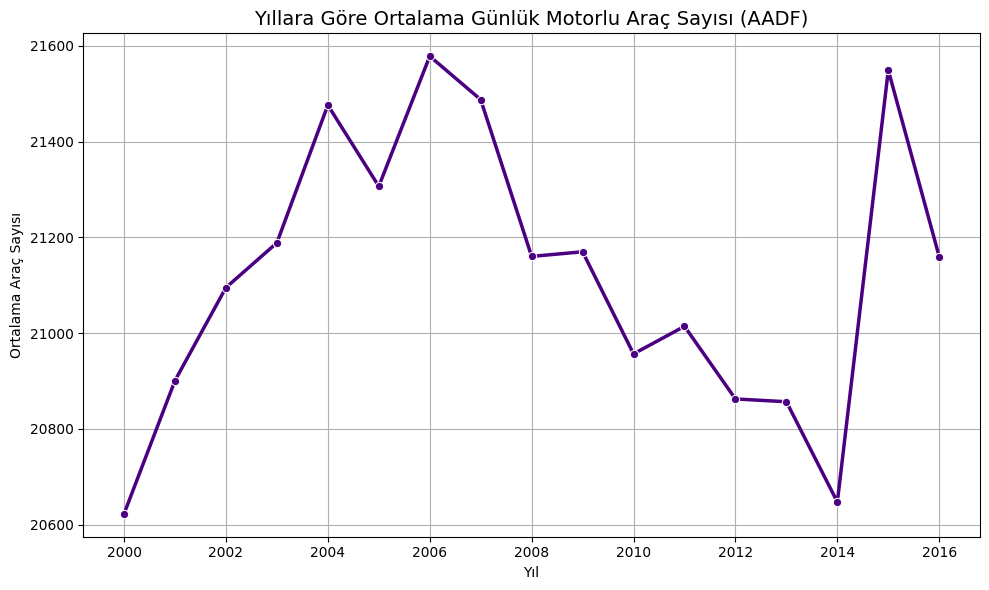

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yıla göre gruplama ve ortalama hesaplama
yearly_avg = df.groupby("AADFYear")["AllMotorVehicles"].mean().reset_index()

# Çizim
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_avg, x="AADFYear", y="AllMotorVehicles", marker="o", linewidth=2.5, color="indigo")
plt.title("Yıllara Göre Ortalama Günlük Motorlu Araç Sayısı (AADF)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Ortalama Araç Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()


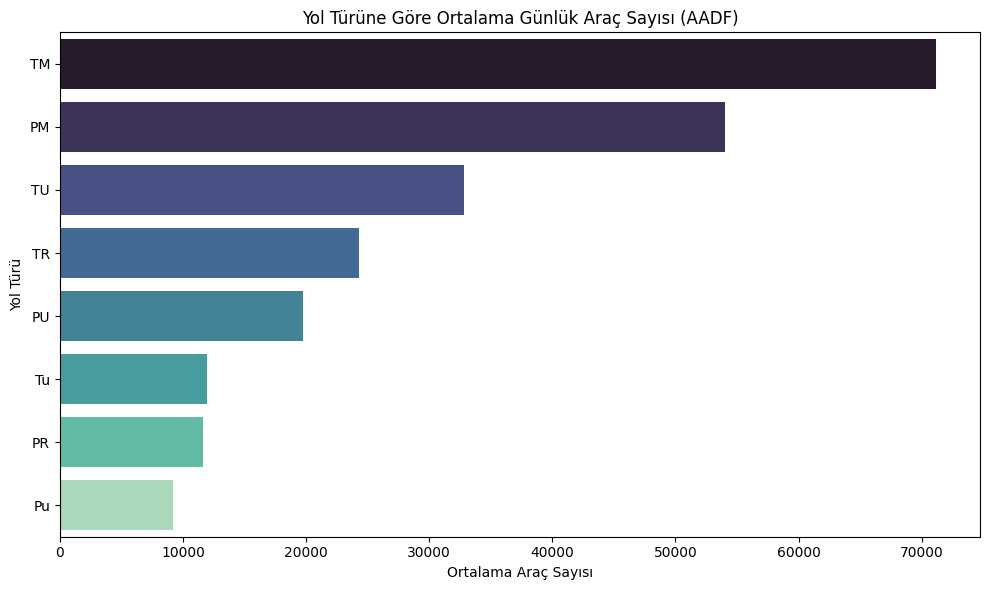

In [15]:
road_avg = df.groupby("RoadCategory")["AllMotorVehicles"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=road_avg, x="AllMotorVehicles", y="RoadCategory", palette="mako")
plt.title("Yol Türüne Göre Ortalama Günlük Araç Sayısı (AADF)")
plt.xlabel("Ortalama Araç Sayısı")
plt.ylabel("Yol Türü")
plt.tight_layout()
plt.show()


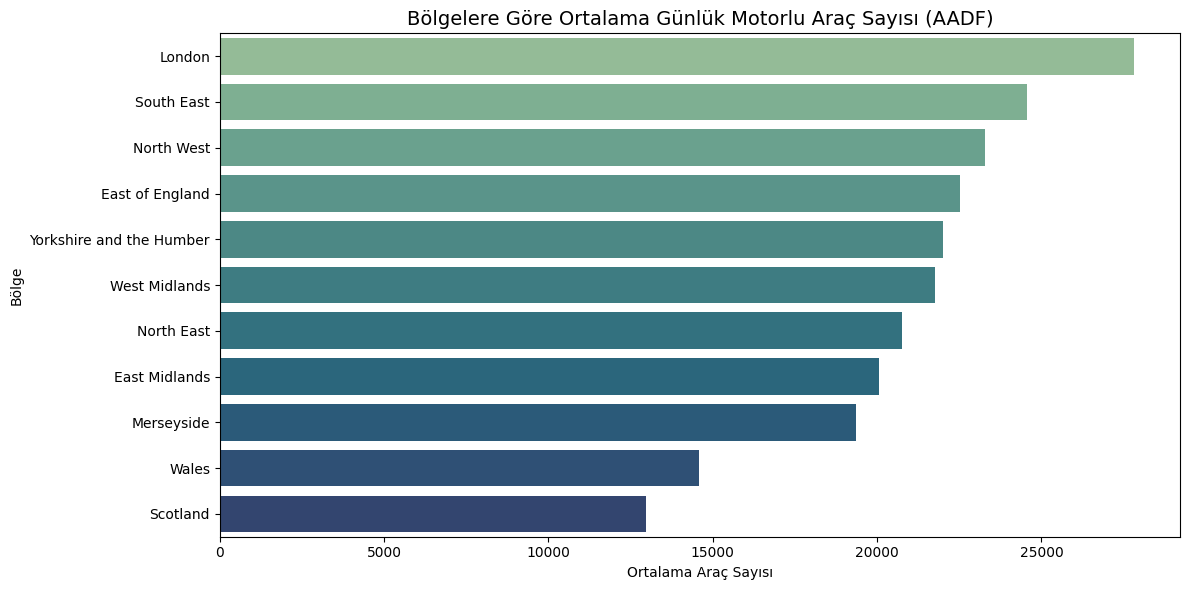

In [16]:
# Grupla ve ortalama al
region_avg = df.groupby("Region")["AllMotorVehicles"].mean().sort_values(ascending=False).reset_index()

# Bar grafiğini çiz
plt.figure(figsize=(12,6))
sns.barplot(data=region_avg, x="AllMotorVehicles", y="Region", palette="crest")
plt.title("Bölgelere Göre Ortalama Günlük Motorlu Araç Sayısı (AADF)", fontsize=14)
plt.xlabel("Ortalama Araç Sayısı")
plt.ylabel("Bölge")
plt.tight_layout()
plt.show()

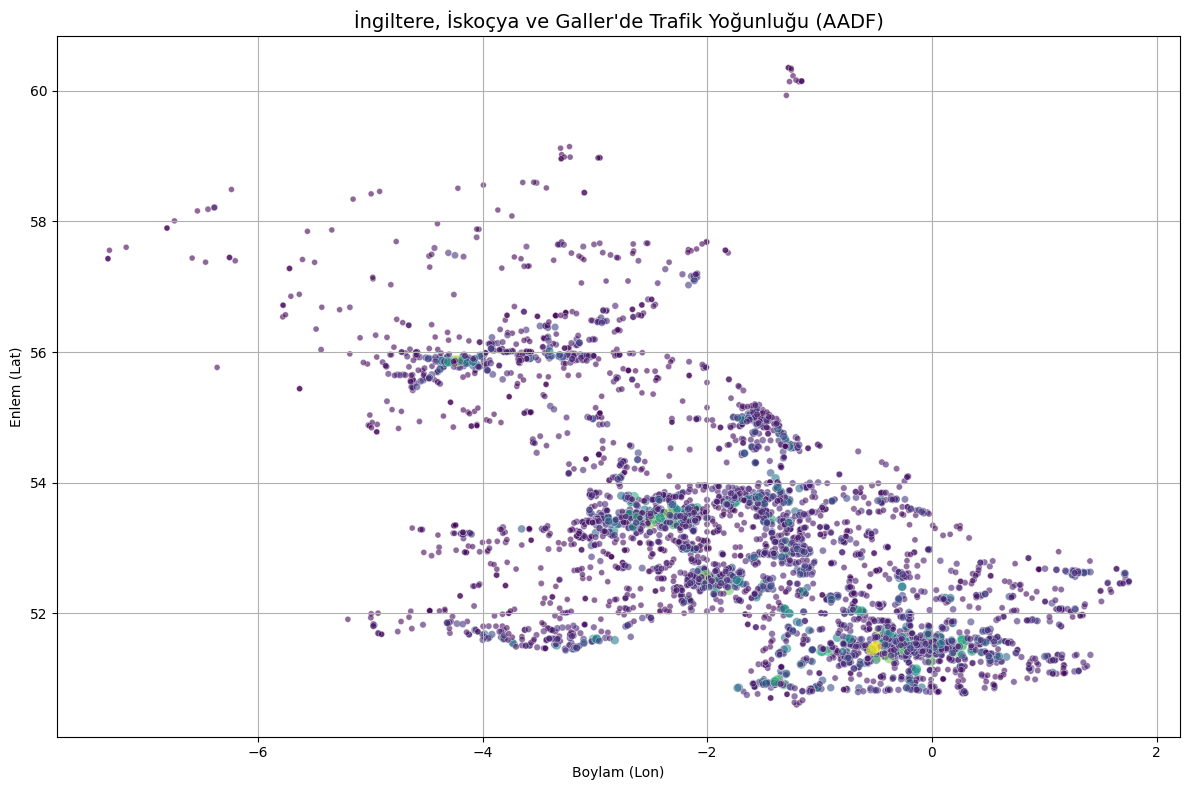

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df.sample(5000),  # performans için örneklem
    x="Lon",
    y="Lat",
    size="AllMotorVehicles",
    hue="AllMotorVehicles",
    palette="viridis",
    alpha=0.6,
    legend=False
)
plt.title("İngiltere, İskoçya ve Galler'de Trafik Yoğunluğu (AADF)", fontsize=14)
plt.xlabel("Boylam (Lon)")
plt.ylabel("Enlem (Lat)")
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

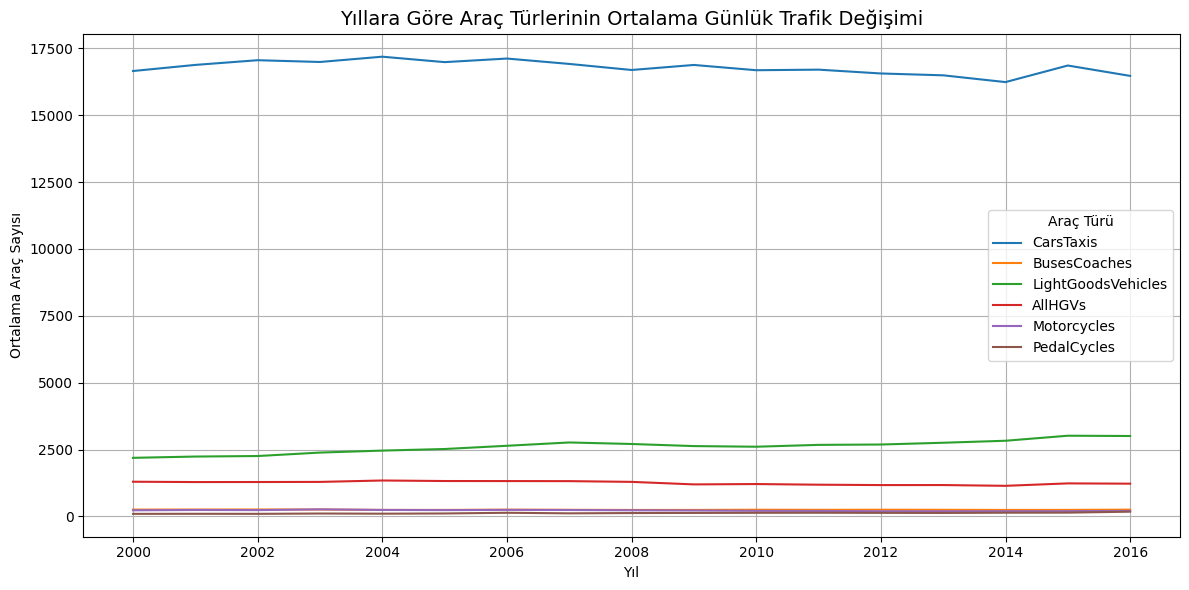

In [20]:
vehicle_types = [
    "CarsTaxis", 
    "BusesCoaches", 
    "LightGoodsVehicles", 
    "AllHGVs", 
    "Motorcycles", 
    "PedalCycles"
]

# Yıllara göre ortalama araç sayısını hesapla
yearly_vehicle = df.groupby("AADFYear")[vehicle_types].mean().reset_index()

plt.figure(figsize=(12, 6))
for vehicle in vehicle_types:
    sns.lineplot(data=yearly_vehicle, x="AADFYear", y=vehicle, label=vehicle)

plt.title("Yıllara Göre Araç Türlerinin Ortalama Günlük Trafik Değişimi", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Ortalama Araç Sayısı")
plt.legend(title="Araç Türü")
plt.grid(True)
plt.tight_layout()
plt.show()
